<a href="https://colab.research.google.com/github/dskeshav/Airplane-Accident-Severity-Prediction/blob/master/AirplaneAccidentSeverity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airplane Accident Severity Predictor

In [0]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# loading the training and test dataset 
training_dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/AircraftAccident/train.csv')
testing_dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/AircraftAccident/test.csv')

In [0]:
# find the shapes of dataset
print("Training dataset size: ",training_dataset.shape)
print("Testing dataset size:", testing_dataset.shape)

Training dataset size:  (10000, 12)
Testing dataset size: (2500, 11)


In [0]:
training_dataset.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.44810,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.10935,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.19524,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.98341,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.39900,1,1.389295,6324


In [0]:
training_dataset.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636910,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336420,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641515,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651220,5.00000,2.365378,12500.000000


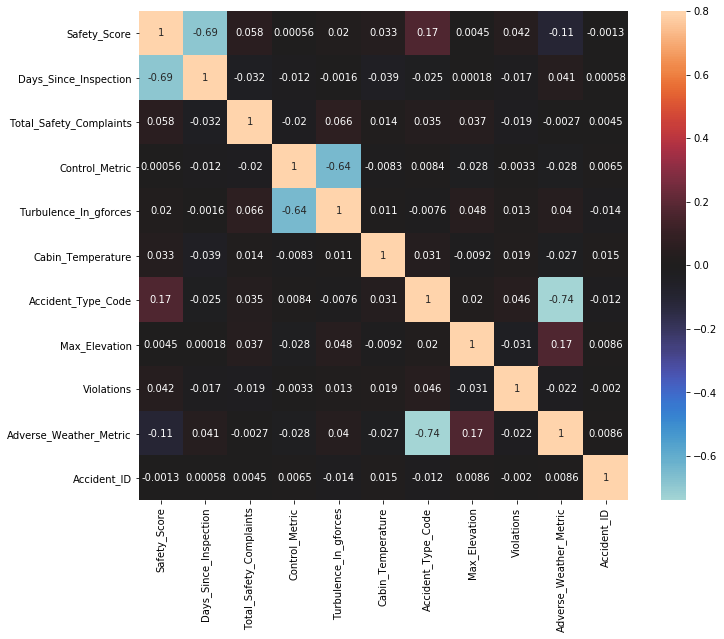

In [0]:
import seaborn as sns
corrmat=training_dataset.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,center=0,vmax=.8,square=True,annot=True)
plt.show()

From the Coreleation matrix it is evident that there exist a negative coreleation, which induces multi-colinearity. So to avoid the effect of multi-colinearity in accuracy of Classification model **Decision Tree Classifier** Algorithm is better in building the model.

In [0]:
# Input and output fields
target= 'Severity'
columns = [c for c in training_dataset.columns if c != 'Severity']

In [0]:
# Import model class
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [0]:
#Preprocessing the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:

models = []
results =[]
names=[]
models.append(("SVC", SVC()))
models.append(("dtc",DecisionTreeClassifier(criterion ='entropy',max_depth=25,max_leaf_nodes=250)))


seed=7
scoring='accuracy'
# KFold Cross Validation
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    s = StandardScaler()
    # pt = PowerTransformer()
    p = Pipeline(steps=[('s',s),('m',model)])
    cv_results=model_selection.cross_val_score(p, training_dataset[columns],training_dataset['Severity'], cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
 

SVC: 0.869200 (0.011652)
dtc: 0.942200 (0.007600)


In [0]:
training_dataset.drop(training_dataset.loc[training_dataset['Safety_Score']==0].index, inplace=True)
training_dataset.shape

(9995, 12)

In [0]:
# Decision Tree cross validation for various sample split

for i in range(2,11):
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    s = StandardScaler()
    # pt = PowerTransformer()
    p = Pipeline(steps=[('s',s),('m',DecisionTreeClassifier(criterion ='entropy',max_depth=100,max_leaf_nodes=250, min_samples_split=i))])
    cv_results=model_selection.cross_val_score(p, training_dataset[columns],training_dataset['Severity'], cv=kfold, scoring=scoring)
    print("DTC: min sample %d: %f(%f)"%(i, cv_results.mean(),cv_results.std() ))

DTC: min sample 2: 0.942470(0.008236)
DTC: min sample 3: 0.942770(0.007544)
DTC: min sample 4: 0.942870(0.008918)
DTC: min sample 5: 0.943070(0.008385)
DTC: min sample 6: 0.941570(0.008015)
DTC: min sample 7: 0.942269(0.009069)
DTC: min sample 8: 0.942370(0.008710)
DTC: min sample 9: 0.941970(0.007701)
DTC: min sample 10: 0.940569(0.007900)


In [0]:
# Fit the model and save prediction to csv file
s = StandardScaler()
model = Pipeline(steps=[('s',s),('m',DecisionTreeClassifier(criterion ='entropy',max_depth=25,max_leaf_nodes=250))])
model.fit(training_dataset[columns],training_dataset['Severity'])
testing_dataset=s.transform(testing_dataset)
predictions = model.predict(testing_dataset)
pd.DataFrame(predictions, columns=['predictions']).to_csv('/content/drive/My Drive/Colab Notebooks/AircraftAccident/results_3.csv')
# output=pd.DataFrame(predictions)
# output=pd.DataFrame(data={"Accident_ID":testing_dataset["Accident_ID"],"Severity":predictions}) 
# output.to_csv("/content/drive/My Drive/Colab Notebooks/AircraftAccident/results_3.csv",index=False,sep=',')

In [0]:
# Find the class distrubtion
training_dataset.groupby(['Severity']).count()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,,,,,,,,,,,
Highly_Fatal_And_Damaging,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044
Minor_Damage_And_Injuries,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527
Significant_Damage_And_Fatalities,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
Significant_Damage_And_Serious_Injuries,2729,2729,2729,2729,2729,2729,2729,2729,2729,2729,2729
